# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [1]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

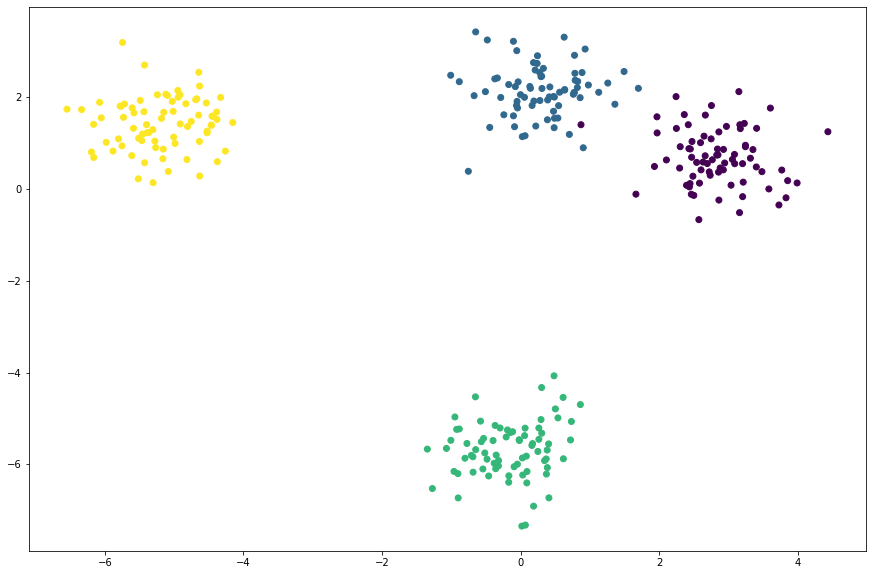

In [10]:
#make the dataset with make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=73)

fig = plt.figure(figsize=(15,10))
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show();


# Step 2: Creating the KNN function
Pseudocode below to help out! Note: **IT IS NOT ACTUAL CODE**

In [11]:
# define train test split
#X_train
#X_test
#y_train
#y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [12]:
def get_eucledian_distance(v1,v2):
    distance = np.sqrt(sum((v1-v2)**2))
    return distance

In [13]:
def get_all_distances(X_train, v1):
    dist_list = []
    for index, v2 in enumerate(X_train):
        result = get_eucledian_distance(v1,v2)
        dist_list.append([index, result])
    return dist_list

In [14]:
def select_neighbours(dist_list, k):
    sl = sorted(dist_list,key=lambda x: x[1])
    return sl[:k]
    

In [15]:
def predict(final_n, y_train):
    # access the index from my sliced_sorted_list
    # get the y_train label corresponding to that index
    neighbors = []
    for i in range(len(final_n)):
        neighbors.append(y_train[final_n[i][0]])
    return max(set(neighbors), key=neighbors.count)



In [16]:
def KNN(X_train, X_test, y_train, y_test, k):
    # given a vector, [2.5, 4.56, 2]
    # sample X_train : [2.5,4.56] = x1,x2
    # search with same index: y_train = 2
    
    # rember to do it for all X_test vectors
    # CASE: ONE SINGLE X_train vector:
    y_pred = []
    for v1 in X_test:
        dist_list = []
        for index, v2 in enumerate(X_train):
            result = get_eucledian_distance(v1,v2)
            dist_list.append([index, result])
        final_n = select_neighbours(dist_list, k)
        y_pred.append(predict(final_n, y_train))
    return np.array(y_pred)

# score... --> using sklearn.metrics
# or comparing 1 by 1 (ypred - ytest)
# plot... do it inside in a separate function or outside. 
    
        

In [17]:
y_pred = KNN(X_train, X_test, y_train, y_test, 3)

In [18]:
from sklearn.metrics import make_score

